In [1]:
# 생선의 길이
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 생선의 무게
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
# Numpy로 data 준비
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
# column_stack: 전달받은 리스트를 일렬로 세운 후, 차례대로 나란히 연결

In [5]:
# list가 잘 연결되었는지, data 확인 (0~4)
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
# target data 만들기: concatenate 함수를 이용하여 2개의 배열을 하나로 결합
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
# scikit_learn으로 data 나누기
# fish_data, fish_target data 를 데이터 세트를 훈련 세트와 테스트 세트로 분할
from sklearn.model_selection import train_test_split

# stratify=fish_target: 분할 시 클래스의 비율을 유지(분류 작업시 일반적으로 사용)
# random_state=42: 랜덤성을 제어 (데이터 분할이 동일하게 유지)
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [10]:
# 수상한 도미 찾기 시작
# k-최근접 이웃
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target) 
kn.score(test_input, test_target)

1.0

In [11]:
print(kn.predict([[25, 150]]))
# 도미 찾아야 하는데 빙어가 나옴(0)

[0.]


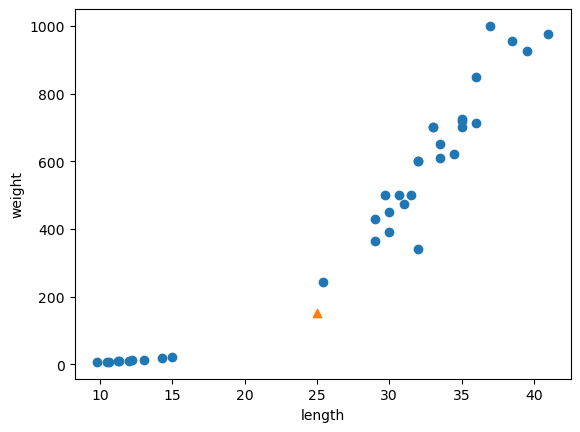

In [13]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
distances, indexes = kn.kneighbors([[25, 150]])

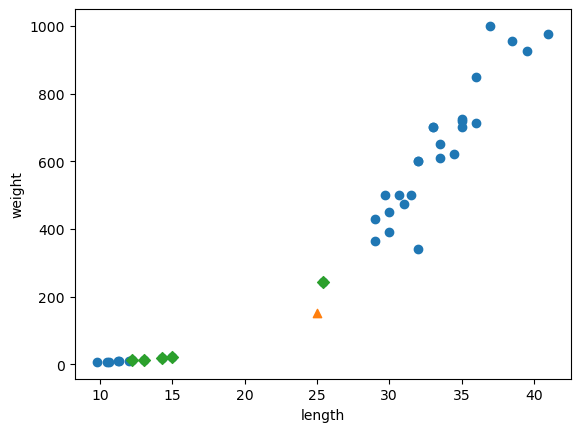

In [16]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') #indexes: 배열 indexing
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

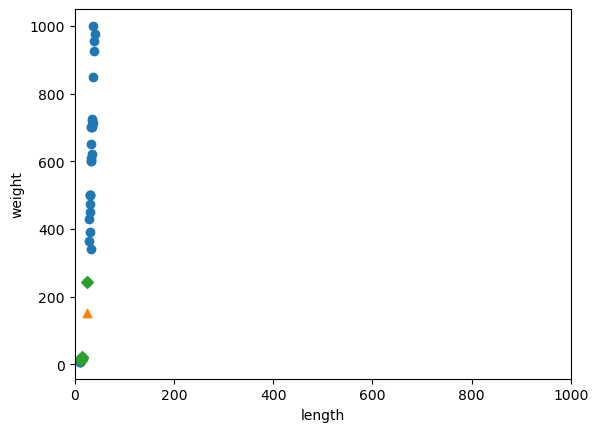

In [17]:
# 기준을 맞추자
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') #indexes: 배열 indexing
plt.xlim((0,1000)) # 축의 범위(scale)를 지정할수 있는 method
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# answer: 무게가 생선을 구분하는데 큰 영향을 미침, 길이는 거이 미치는 영향 없음.
# k-최근접 이웃 알고리즘은 가장 가까운 주변 sample을 찾기 때문에, 특성의 거리가 다르면 문제가 될수도. -> 두 샘플에 scale을 맞춰줘야 하는 알고리즘을 찾아야함.

In [19]:
# 표준 점수로 봐꾸는것 -> 일반적으로 많이 쓰는 전처리 방법
# axis = 0: 이건 특성마다 값의 scale이 다르므로, 평균 & 표준편차는 각 특성별로 계산 & 연산이 각 열에 대해 수행되어야 함
# mean: 평균, std: 표준편차
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [25]:
train_scaled = (train_input - mean) / std

<function matplotlib.pyplot.show(close=None, block=None)>

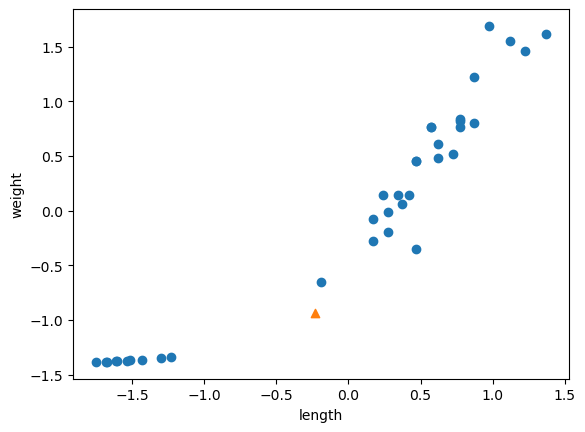

In [26]:
# Numpy Broadcasting
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [27]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [28]:
print(kn.predict([new]))

[1.]


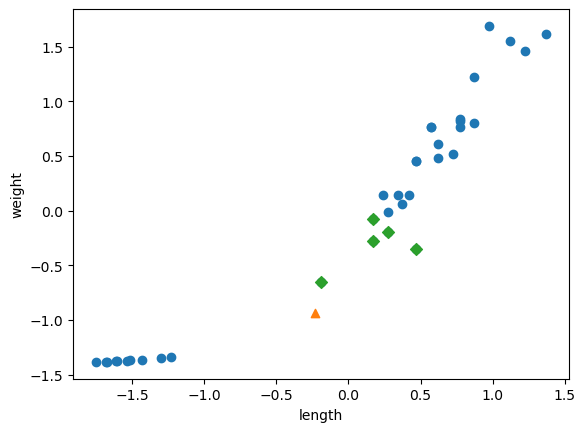

In [30]:
# sample에서 가장 가까운건 도미
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()